# Airbnb Experience in Berlin throughout the year of 2023

### 1. Setting up

#### 1.1. Import libraries

In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from random import randint 
from time import sleep
import seaborn as sns

#### 1.2. Use selenium to access all information from a interactive webpage

In [2]:
# install 
# pip install selenium
# pip install webdriver-manager

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
# importing time to make delays
import time

In [4]:
# As the webpage is interactive the URL does not change, thus the outcome to proceed needs to be a page_source

url = "https://www.airbnb.com/s/Berlin--Germany/experiences?tab_id=experience_tab&refinement_paths%5B%5D=%2Fexperiences&query=Berlin%2C%20Germany&place_id=ChIJAVkDPzdOqEcRcDteW0YgIQQ&flexible_trip_lengths%5B%5D=one_week&rank_mode=default&date_picker_type=calendar&checkin=2023-01-30&checkout=2023-12-31&source=structured_search_input_header&search_type=filter_change&locale=en&country_override=US"
options = Options()
# options.add_argument("--disable-notifications")
# to prevent from being spotted as a robot
options.add_argument('--disable-gpu')
options.add_argument('user-agent=fake-useragent')
# installing chromedriver, so that we dont need to keep the chromedriver file
# that needs to be updated every once in a while. better install the latest automatically
driver = webdriver.Chrome(ChromeDriverManager().install())
# opens the browser, maximize window size
driver.maximize_window()
# opening url
driver.get(url)
# wait a bit until the "I accept" popup shows
time.sleep(6)
driver.execute_script("window.scrollTo(0, window.scrollY + 1500)") 
time.sleep(.2)
driver.execute_script("window.scrollTo(0, window.scrollY + 1500)") 
time.sleep(.2)
driver.execute_script("window.scrollTo(0, window.scrollY + 1500)") 
time.sleep(.2)
okay_xpath = "/html/body/div[5]/div/div/div[1]/div/div[1]/div/div/div/div/div/div[1]/main/div[2]/div/div[4]/div/div/div/div/div"
okay = driver.find_element(By.XPATH, okay_xpath)
okay.click()

html1 = driver.page_source
end = False
while not end:
    time.sleep(1)
    driver.execute_script("window.scrollTo(0, window.scrollY + 1500)") 
    time.sleep(.2)
    driver.execute_script("window.scrollTo(0, window.scrollY + 1500)") 
    time.sleep(.2)
    driver.execute_script("window.scrollTo(0, window.scrollY + 1500)") 
    time.sleep(.2)
    driver.execute_script("window.scrollTo(0, window.scrollY + 1500)") 
    time.sleep(.2)
    driver.execute_script("window.scrollTo(0, window.scrollY + 1500)") 
    time.sleep(.2)
    try:
        okay_xpath = "/html/body/div[5]/div/div/div[1]/div/div[1]/div/div/div/div/div/div[1]/main/div[2]/div/div[4]/div/div/div/div/div"
        okay = driver.find_element(By.XPATH, okay_xpath)
        okay.click()
    except:
        pass
    # getting page source after scrolling
    html2 = driver.page_source
    # comparing html_before and html_after
    if html1 == html2:
        end = True
    else:
        html1 = html2

/var/folders/15/hgt62pt91txfslsjk64n8zd40000gp/T/ipykernel_20973/101885452.py:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [5]:
html = driver.page_source
soup = BeautifulSoup(html)

In [6]:
#soup

### 2. Get airbnb Experience in Berlin

In [7]:
#soup.prettify()

##### 2.1. Collect the name of the available tours

In [8]:
soup.select("div.cpzcz7c.dir")[53].get('aria-label')

'A gentle sightseeing-run along (remains of) the Berlin Wall'

In [9]:
tour_name = []

num_iter = len(soup.select("div.cpzcz7c.dir.dir-ltr"))

namelist = soup.select("div.cpzcz7c.dir.dir-ltr")

for i in range(num_iter):
    tour_name.append(namelist[i].get('aria-label'))

print(tour_name)

['Rude Bastards tour of Berlin', 'No Diet Club - Paradise of street food in Berlin', 'Discover Berlin', 'Hitler’s camps – Sachsenhausen', 'Nightclub Access \nAll Berlin Clubs', 'Vegan Food & Sustainability Tour -Discover the vegan capital', 'Guided bar tour', 'Explore Berlin with a portrait photographer', 'Hip Berlin Underground Tour', 'DJing - Hands-on Workshop', 'Kreuzberg Food Tour', 'The Dark Heart of the Third Reich', 'Hitler’s Berlin - the rise and fall', 'English Comedy Berlin + Pizza + Shots', 'East Berlin - a Brief Tour', 'English Comedy Show on a boat', 'Techno Painting with a Berlin Artist', 'Club like a local in Berlin', 'Holocaust & Nazi Resistance Tour', 'Street Art & Graffiti Tour', 'Discover how to produce House Music & Techno in Berlin', 'Discover Electronic Music Production', 'Hands on DJ-Masterclass', 'BERLIN FASHION TOUR shop@ hidden spots', 'Jewish places and stories', 'English Comedy Show', 'Berlin with a Private Photographer', "Discover Berlin's Highlights on a b

In [10]:
len(tour_name)

174

#### 2.2 Get information on the rating

In [11]:
soup.select("#site-content > div.a5ur7i2.a19cg8fd.slyerxe.aogojft.ay00grh.dir.dir-ltr > div > div:nth-child(3) > div > div > div > div > div > div > div > div > div > div > div:nth-child(1) > div.cpzcz7c.dir.dir-ltr > div.k1conusl.k8yrq8q.dir.dir-ltr")

[<div class="k1conusl k8yrq8q dir dir-ltr"><span aria-label="4.93 out of 5 average rating,  1,275 reviews" class="s152u6ru r4a59j5 dir dir-ltr" role="img"><span class="su0q88m dir dir-ltr"><svg aria-hidden="true" focusable="false" role="presentation" style="display:block;height:12px;width:12px;fill:currentColor" viewbox="0 0 32 32" xmlns="http://www.w3.org/2000/svg"><path d="M15.094 1.579l-4.124 8.885-9.86 1.27a1 1 0 0 0-.542 1.736l7.293 6.565-1.965 9.852a1 1 0 0 0 1.483 1.061L16 25.951l8.625 4.997a1 1 0 0 0 1.482-1.06l-1.965-9.853 7.293-6.565a1 1 0 0 0-.541-1.735l-9.86-1.271-4.127-8.885a1 1 0 0 0-1.814 0z" fill-rule="evenodd"></path></svg></span><span aria-hidden="true" class="r1dxllyb dir dir-ltr">4.93 (1,275)</span></span><div aria-hidden="true">·</div><span class="k64hfjz dir dir-ltr">3.5 hours</span></div>]

In [12]:
soup.select("div.k1conusl.k8yrq8q.dir.dir-ltr span")[1].get('aria-label')

In [13]:
rating = []

num_iter = len(soup.select("div.k1conusl.k8yrq8q.dir.dir-ltr span"))

namelist = soup.select("div.k1conusl.k8yrq8q.dir.dir-ltr span")

for i in range(num_iter):
    rating.append(namelist[i].get('aria-label'))

print(rating)

['4.93 out of 5 average rating,  1,275 reviews', None, None, None, '5.0 out of 5 average rating,  4 reviews', None, None, None, '4.94 out of 5 average rating,  685 reviews', None, None, None, '5.0 out of 5 average rating,  15 reviews', None, None, None, '4.96 out of 5 average rating,  110 reviews', None, None, None, '4.99 out of 5 average rating,  81 reviews', None, None, None, '5.0 out of 5 average rating,  12 reviews', None, None, None, '5.0 out of 5 average rating,  16 reviews', None, None, None, '4.92 out of 5 average rating,  661 reviews', None, None, None, '4.93 out of 5 average rating,  15 reviews', None, None, None, '4.94 out of 5 average rating,  200 reviews', None, None, None, '4.94 out of 5 average rating,  172 reviews', None, None, None, '4.95 out of 5 average rating,  490 reviews', None, None, None, '4.87 out of 5 average rating,  189 reviews', None, None, None, '4.98 out of 5 average rating,  52 reviews', None, None, None, '4.9 out of 5 average rating,  290 reviews', None

In [14]:
len(rating)

696

In [15]:
rating = list(filter(lambda a: a !=None, rating))

In [16]:
len(rating)

174

In [17]:
# TO DO: Filter out the rating and reviews

#### 2.3. Get the price for each experience

In [18]:
soup.select("div.pjtk2bq.dir.dir-ltr span span span span")[0].string

'From $4'

In [19]:
price = []

num_iter = len(soup.select("div.pjtk2bq.dir.dir-ltr span span span span"))

namelist = soup.select("div.pjtk2bq.dir.dir-ltr span span span span")

for i in range(num_iter):
    price.append(namelist[i].string)

print(price)

['From $4', 'From $48', 'From $22', 'From $65', 'From $218', 'From $75', 'From $98', 'From $66', 'From $34', 'From $39', 'From $82', 'From $44', 'From $33', 'From $27', 'From $17', 'From $11', 'From $82', 'From $90', 'From $33', 'From $32', 'From $55', 'From $71', 'From $82', 'From $49', 'From $41', 'From $7', 'From $71', 'From $39', 'From $54', 'From $66', 'From $39', 'From $20', 'From $32', 'From $108', 'From $21', 'From $55', 'From $6', 'From $65', 'From $28', 'From $33', 'From $17', 'From $10', 'From $66', 'From $97', 'From $66', 'From $22', 'From $40', 'From $86', 'From $32', 'From $43', 'From $34', 'From $48', 'From $44', 'From $22', 'From $93', 'From $62', 'From $22', 'From $39', 'From $18', 'From $33', 'From $28', 'From $11', 'From $22', 'From $3', 'From $113', 'From $87', 'From $14', 'From $55', 'From $72', 'From $93', 'From $98', 'From $48', 'From $17', 'From $93', 'From $28', 'From $22', 'From $28', 'From $81', 'From $46', 'From $86', 'From $44', 'From $55', 'From $28', 'Fro

In [20]:
len(price)

174

In [42]:
def clean_price(df):
    df = [s.replace('From $', '') for s in df]
    return df

In [43]:
price = clean_price(price)

#### 2.4 Get the duration

In [24]:
soup.select("span.k64hfjz.dir.dir-ltr")[0].string

'3.5 hours'

In [25]:
duration = []

num_iter = len(soup.select("span.k64hfjz.dir.dir-ltr"))

namelist = soup.select("span.k64hfjz.dir.dir-ltr")

for i in range(num_iter):
    duration.append(namelist[i].string)

print(duration)

['3.5 hours', '3 hours', '3.5 hours', '5 hours', '1 hour', '3 hours', '4 hours', '1.5 hours', '2.5 hours', '1 hour', '3 hours', '2 hours', '2.5 hours', '3 hours', '2.5 hours', '2 hours', '3 hours', '6 hours', '2.5 hours', '2 hours', '2 hours', '2 hours', '2 hours', '2.5 hours', '3 hours', '2 hours', '1.5 hours', '3.5 hours', '3 hours', '1 hour', '1 hour', '3 hours', '4.5 hours', '3 hours', '2 hours', '1 hour', '2 hours', '2 hours', '4.5 hours', '1 hour', '2 hours', '1 hour', '1.5 hours', '1.5 hours', '1.5 hours', '4 hours', '2 hours', '2 hours', '6 hours', '3 hours', '3.5 hours', '1.5 hours', '2 hours', '1 hour', '3.5 hours', '2.5 hours', '3 hours', '1 hour', '2 hours', '1.5 hours', '2 hours', '3 hours', '2.5 hours', '2.5 hours', '7.5 hours', '8 hours', '1.5 hours', '4 hours', '3 hours', '3 hours', '3 hours', '1.5 hours', '3 hours', '3 hours', '16 hours', '1 hour', '3 hours', '2.5 hours', '3 hours', '1.5 hours', '4 hours', '4 hours', '5 hours', '4 hours', '3 hours', '2 hours', '1.5 hou

In [26]:
len(duration)

174

##### 2.5 Get the URL

In [27]:
soup.select("div.cpzcz7c.dir.dir-ltr > a")[0]

<a aria-label="Rude Bastards tour of Berlin" class="lnyqw4n dir dir-ltr" data-check-info-section="true" href="/experiences/1667898?checkin=2023-01-30&amp;checkout=2023-12-31&amp;location=Berlin%2C%20Germany&amp;currentTab=experience_tab&amp;federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&amp;searchId=e908a009-23fc-45eb-b2de-6fb29386159b&amp;sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e" rel="noopener noreferrer nofollow" target="_blank"></a>

In [28]:
soup.select("div.cpzcz7c.dir.dir-ltr > a")[0]['href']

'/experiences/1667898?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e'

In [29]:
url = []

num_iter = len(soup.select("div.cpzcz7c.dir.dir-ltr > a"))

namelist = soup.select("div.cpzcz7c.dir.dir-ltr > a")

for i in range(num_iter):
    url.append(namelist[i]['href'])

print(url)

['/experiences/1667898?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e', '/experiences/4696766?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e', '/experiences/2551364?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e', '/experiences/2706307?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2

In [30]:
airbnb = "https://www.airbnb.com"

In [31]:
url = [airbnb+s for s in url]
url

['https://www.airbnb.com/experiences/1667898?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e',
 'https://www.airbnb.com/experiences/4696766?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e',
 'https://www.airbnb.com/experiences/2551364?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e',
 'https://www.airbnb.com/experiences/2706307?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experienc

In [32]:
# Insert airbnb.com before

In [33]:
#Get the location
# url_1 = url[0]
# response = requests.get(url_1)
# print(response.status_code)

# # parse & store html
# soup = BeautifulSoup(response.content, "html.parser")

In [34]:
soup

<html class="js-focus-visible" data-hyperloop-version="1" data-is-hyperloop="true" dir="ltr" lang="en" style="--vh:6.78px; --vw:14.4px; --vw-unitless:1440; --vw-px:1440px;"><head><style>.gm-control-active>img{box-sizing:content-box;display:none;left:50%;pointer-events:none;position:absolute;top:50%;transform:translate(-50%,-50%)}.gm-control-active>img:nth-child(1){display:block}.gm-control-active:focus>img:nth-child(1),.gm-control-active:hover>img:nth-child(1),.gm-control-active:active>img:nth-child(1),.gm-control-active:disabled>img:nth-child(1){display:none}.gm-control-active:focus>img:nth-child(2),.gm-control-active:hover>img:nth-child(2){display:block}.gm-control-active:active>img:nth-child(3){display:block}.gm-control-active:disabled>img:nth-child(4){display:block}
</style><link href="https://fonts.googleapis.com/css?family=Roboto:300,400,500,700|Google+Sans:400,500,700|Google+Sans+Text:400&amp;lang=en" rel="stylesheet" type="text/css"/><link href="https://fonts.googleapis.com/css

In [35]:
# information = []

# for exp in url:
#     response = requests.get(url)
#     print(exp, response.status_code)
    
    

In [36]:
#### Get everything in a DataFrame
pd.set_option('display.max_columns', None)
experiences = pd.DataFrame({'name': tour_name,
                           'rating':rating, 
                           'price': price,
                           'duration': duration,
                            'url': url
                           })

#experiences.iloc[0,4]

pd.set_option('display.max_colwidth', None)
experiences

,name,rating,price,duration,url
0,Rude Bastards tour of Berlin,"4.93 out of 5 average rating, 1,275 reviews",From $4,3.5 hours,https://www.airbnb.com/experiences/1667898?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e
1,No Diet Club - Paradise of street food in Berlin,"5.0 out of 5 average rating, 4 reviews",From $48,3 hours,https://www.airbnb.com/experiences/4696766?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e
2,Discover Berlin,"4.94 out of 5 average rating, 685 reviews",From $22,3.5 hours,https://www.airbnb.com/experiences/2551364?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e
3,Hitler’s camps – Sachsenhausen,"5.0 out of 5 average rating, 15 reviews",From $65,5 hours,https://www.airbnb.com/experiences/2706307?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e
4,Nightclub Access \nAll Berlin Clubs,"4.96 out of 5 average rating, 110 reviews",From $218,1 hour,https://www.airbnb.com/experiences/838239?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e
...,...,...,...,...,...
169,Heroic portrait photos in secret spots,"5.0 out of 5 average rating, 17 reviews",From $381,3 hours,https://www.airbnb.com/experiences/250132?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e
170,Get better at posing with an analogue portrait photographer,"4.97 out of 5 average rating, 73 reviews",From $141,1 hour,https://www.airbnb.com/experiences/658612?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e
171,Wine Tasting in a charming local wine store,New experience,From $55,2.5 hours,https://www.airbnb.com/experiences/2994238?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e
172,Optimize your communication by training with horses,New experience,From $109,4 hours,https://www.airbnb.com/experiences/4604098?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e


In [37]:
# Split rating column
type(experiences)

pandas.core.frame.DataFrame

In [38]:
experiences[['rating']]

,rating
0,"4.93 out of 5 average rating, 1,275 reviews"
1,"5.0 out of 5 average rating, 4 reviews"
2,"4.94 out of 5 average rating, 685 reviews"
3,"5.0 out of 5 average rating, 15 reviews"
4,"4.96 out of 5 average rating, 110 reviews"
...,...
169,"5.0 out of 5 average rating, 17 reviews"
170,"4.97 out of 5 average rating, 73 reviews"
171,New experience
172,New experience


In [39]:
experiences

,name,rating,price,duration,url
0,Rude Bastards tour of Berlin,"4.93 out of 5 average rating, 1,275 reviews",From $4,3.5 hours,https://www.airbnb.com/experiences/1667898?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e
1,No Diet Club - Paradise of street food in Berlin,"5.0 out of 5 average rating, 4 reviews",From $48,3 hours,https://www.airbnb.com/experiences/4696766?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e
2,Discover Berlin,"4.94 out of 5 average rating, 685 reviews",From $22,3.5 hours,https://www.airbnb.com/experiences/2551364?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e
3,Hitler’s camps – Sachsenhausen,"5.0 out of 5 average rating, 15 reviews",From $65,5 hours,https://www.airbnb.com/experiences/2706307?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e
4,Nightclub Access \nAll Berlin Clubs,"4.96 out of 5 average rating, 110 reviews",From $218,1 hour,https://www.airbnb.com/experiences/838239?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e
...,...,...,...,...,...
169,Heroic portrait photos in secret spots,"5.0 out of 5 average rating, 17 reviews",From $381,3 hours,https://www.airbnb.com/experiences/250132?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e
170,Get better at posing with an analogue portrait photographer,"4.97 out of 5 average rating, 73 reviews",From $141,1 hour,https://www.airbnb.com/experiences/658612?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e
171,Wine Tasting in a charming local wine store,New experience,From $55,2.5 hours,https://www.airbnb.com/experiences/2994238?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e
172,Optimize your communication by training with horses,New experience,From $109,4 hours,https://www.airbnb.com/experiences/4604098?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e


In [40]:
# Export to CSV

experiences.to_csv('experiences.csv')

### 3. Data Cleaning

In [16]:
experiences = pd.read_csv('scraped_experiences.csv')

In [ ]:
experiences['total_reviews'] = experiences['rating'].str.rsplit(',').str[-1] 

In [45]:
experiences.head(2)

,name,rating,price,duration,url,total_reviews
0,Rude Bastards tour of Berlin,"4.93 out of 5 average rating, 1,275 reviews",From $4,3.5 hours,https://www.airbnb.com/experiences/1667898?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e,275 reviews
1,No Diet Club - Paradise of street food in Berlin,"5.0 out of 5 average rating, 4 reviews",From $48,3 hours,https://www.airbnb.com/experiences/4696766?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e,4 reviews


##### 3.1 Rating_new

In [62]:
experiences['rating_new'] = experiences['rating'].str[:4]

In [63]:
experiences['rating_new'] = [s.replace('New', '0') for s in experiences['rating_new']]

In [64]:
experiences

,name,rating,price,duration,url,total_reviews,rating_new
0,Rude Bastards tour of Berlin,"4.93 out of 5 average rating, 1,275 reviews",From $4,3.5 hours,https://www.airbnb.com/experiences/1667898?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e,275 reviews,4.93
1,No Diet Club - Paradise of street food in Berlin,"5.0 out of 5 average rating, 4 reviews",From $48,3 hours,https://www.airbnb.com/experiences/4696766?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e,4 reviews,5.0
2,Discover Berlin,"4.94 out of 5 average rating, 685 reviews",From $22,3.5 hours,https://www.airbnb.com/experiences/2551364?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e,685 reviews,4.94
3,Hitler’s camps – Sachsenhausen,"5.0 out of 5 average rating, 15 reviews",From $65,5 hours,https://www.airbnb.com/experiences/2706307?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e,15 reviews,5.0
4,Nightclub Access \nAll Berlin Clubs,"4.96 out of 5 average rating, 110 reviews",From $218,1 hour,https://www.airbnb.com/experiences/838239?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e,110 reviews,4.96
...,...,...,...,...,...,...,...
169,Heroic portrait photos in secret spots,"5.0 out of 5 average rating, 17 reviews",From $381,3 hours,https://www.airbnb.com/experiences/250132?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e,17 reviews,5.0
170,Get better at posing with an analogue portrait photographer,"4.97 out of 5 average rating, 73 reviews",From $141,1 hour,https://www.airbnb.com/experiences/658612?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e,73 reviews,4.97
171,Wine Tasting in a charming local wine store,New experience,From $55,2.5 hours,https://www.airbnb.com/experiences/2994238?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e,New experience,0
172,Optimize your communication by training with horses,New experience,From $109,4 hours,https://www.airbnb.com/experiences/4604098?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e,New experience,0


<AxesSubplot:xlabel='rating', ylabel='count'>

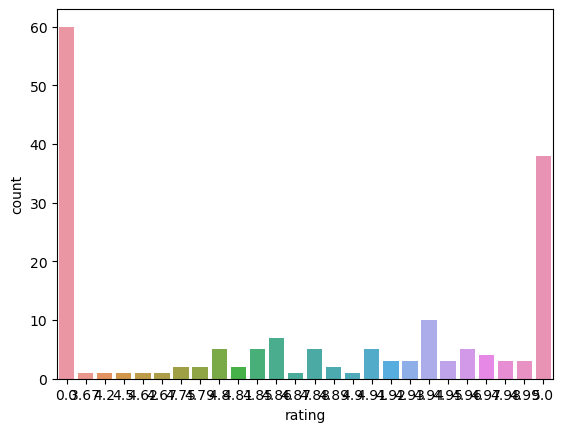

In [10]:
sns.countplot(x=experiences['rating'])

##### total_reviews

In [65]:
experiences['total_reviews'] = [s.replace('reviews', '') for s in experiences['total_reviews']]

In [66]:
experiences['total_reviews'] = [s.replace('New experience', '0') for s in experiences['total_reviews']]

In [67]:
experiences.total_reviews.value_counts()

0         60
  5        7
  3        7
  4        5
  7        4
          ..
  188      1
  68       1
  118      1
  50       1
  73       1
Name: total_reviews, Length: 70, dtype: int64

<AxesSubplot:xlabel='total_reviews'>

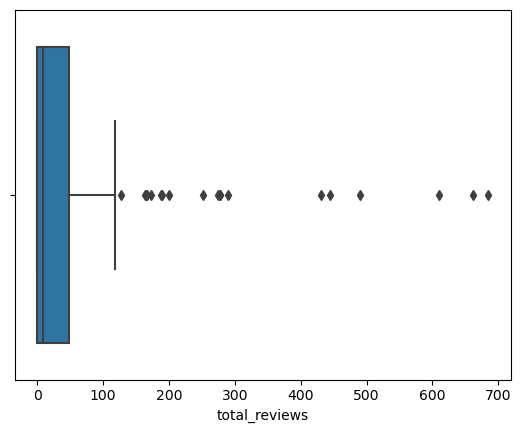

In [11]:
sns.boxplot(x=experiences.total_reviews)

##### duration

In [68]:
experiences['duration'] = [s.replace('hours', '') for s in experiences['duration']]

In [69]:
experiences['duration'] = [s.replace('hour', '') for s in experiences['duration']]

In [70]:
experiences.duration.value_counts()

3       37
2       32
1       25
1.5     24
2.5     17
4       15
3.5      9
5        5
4.5      3
6        2
8        2
7.5      1
16       1
10       1
Name: duration, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='count'>

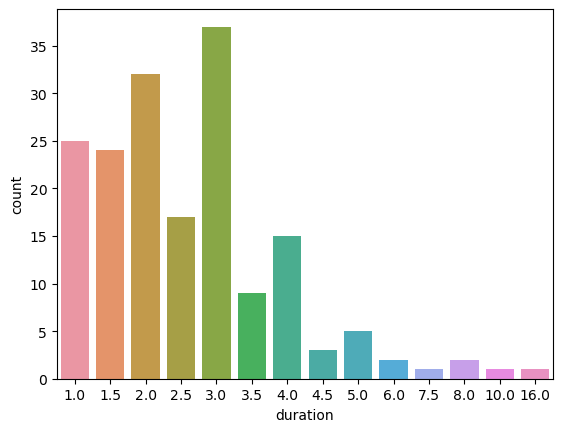

In [13]:
sns.countplot(x=experiences.duration)

##### price

In [74]:
experiences['price'] = [s.replace('From $', '') for s in experiences['price']]

In [75]:
experiences.price.value_counts()

22     10
55      9
28      8
39      8
33      5
       ..
72      1
81      1
2       1
196     1
141     1
Name: price, Length: 72, dtype: int64

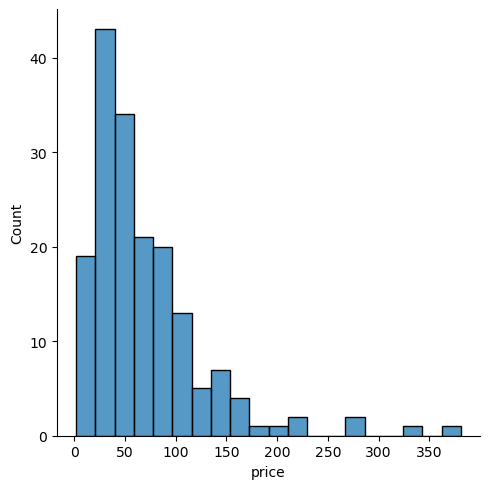

In [15]:
sns.displot(x = experiences.price)

In [76]:
experiences.dtypes

name             object
rating           object
price            object
duration         object
url              object
total_reviews    object
rating_new       object
dtype: object

In [77]:
experiences['price'] = experiences['price'].astype(int)
experiences['duration'] = experiences['duration'].astype(float)
experiences['rating_new'] = experiences['rating_new'].astype(float)
experiences['total_reviews'] = experiences['total_reviews'].astype(int)

experiences = experiences.drop(['rating'], axis = 1)

In [78]:
experiences.head()

,name,price,duration,url,total_reviews,rating_new
0,Rude Bastards tour of Berlin,4,3.5,https://www.airbnb.com/experiences/1667898?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e,275,4.93
1,No Diet Club - Paradise of street food in Berlin,48,3.0,https://www.airbnb.com/experiences/4696766?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e,4,5.00
2,Discover Berlin,22,3.5,https://www.airbnb.com/experiences/2551364?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e,685,4.94
3,Hitler’s camps – Sachsenhausen,65,5.0,https://www.airbnb.com/experiences/2706307?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e,15,5.00
4,Nightclub Access \nAll Berlin Clubs,218,1.0,https://www.airbnb.com/experiences/838239?checkin=2023-01-30&checkout=2023-12-31&location=Berlin%2C%20Germany&currentTab=experience_tab&federatedSearchId=547258f5-5f72-484c-99c6-a4816bedabe7&searchId=e908a009-23fc-45eb-b2de-6fb29386159b&sectionId=da821b0a-cb3f-46ea-9bc1-6b50853ffa8e,110,4.96


In [79]:
experiences = experiences[['name', 'price', 'rating_new', 'total_reviews', 'duration', 'url']]
experiences = experiences.rename({'rating_new': 'rating'}, axis=1)

In [80]:
experiences.to_csv("experiences.csv")

#### Get the Geolocation of each experience

**Comment** Scraping the geolocations is a real challenge and will be tackled in the next step

In [156]:
#Get the location
url_1 = url[0]
url_1
response_url = requests.get(url_1)
print(response_url.status_code)

# parse & store html
soup_url = BeautifulSoup(response_url.content, "html.parser")

200


In [133]:
# soup_url.find("div:nth-child(2) > div > div > div:nth-child(2)")

In [85]:
# from selenium import webdriver
# from selenium.webdriver.chrome.options import Options 
# import time
# from bs4 import BeautifulSoup
# import urllib.parse as urlparse
# from urllib.parse import parse_qs

In [96]:
# def main():
#     chrome_options = Options()  
#     chrome_options.add_argument("--headless")  #if you don't want the GUI to pop up
#     driver = webdriver.Chrome(options=chrome_options)
#     driver.get(url_1)
#     time.sleep(2)
#     soup = BeautifulSoup(driver.page_source, "lxml")
#     url = (soup.find("img", {"data-testid":"map/GoogleMap"}))
#     parsed = urlparse.urlparse(url)
#     print(parse_qs(parsed.query))

# if __name__ == '__main__':
#     main()

{}


In [157]:
soup_url.select('div:nth-child(2)')

[<div class="cqvtwb5 dir dir-ltr"><div class="_poaz3m"><div class="_t0k0we" data-testid="dot-loader"><div class="_1fgkwjk3"></div><div class="_11ckf5n4"></div><div class="_2ovlnq"></div></div></div></div>,
 <div class="_11ckf5n4"></div>,
 <div class="_1ubw29"><a aria-expanded="false" aria-label="Choose a language and currency" class="c1jdlqzl c177491c dir dir-ltr" href="#simple-header-locale-menu-combined"><div class="l1hgmivi dir dir-ltr"><div aria-hidden="true" class="_z5mecy"><svg aria-hidden="true" focusable="false" role="presentation" style="display:block;height:16px;width:16px;fill:currentColor" viewbox="0 0 16 16" xmlns="http://www.w3.org/2000/svg"><path d="m8.002.25a7.77 7.77 0 0 1 7.748 7.776 7.75 7.75 0 0 1 -7.521 7.72l-.246.004a7.75 7.75 0 0 1 -7.73-7.513l-.003-.245a7.75 7.75 0 0 1 7.752-7.742zm1.949 8.5h-3.903c.155 2.897 1.176 5.343 1.886 5.493l.068.007c.68-.002 1.72-2.365 1.932-5.23zm4.255 0h-2.752c-.091 1.96-.53 3.783-1.188 5.076a6.257 6.257 0 0 0 3.905-4.829zm-9.661 0h-2

In [2]:
#soup_url.select("div > a").get('href')

In [1]:
#soup_url.select("a",{"target":"_blank"})[6]

In [186]:
#site-content > div:nth-child(1) > div:nth-child(4) > div > div > div > div:nth-child(2) > div._88xxct > div > div:nth-child(4) > div:nth-child(2) > div > div > div:nth-child(9) > button